# Determining the salary for player in FIFA 18

This dataset obtained from www.kaggle.com contains 185 fields for every player in FIFA 18:
 - Player info such as age, club, league, nationality, salary and physical attributes
 - All playing attributes, such as finishing and dribbling
 - Special attributes like skill moves and international reputation
 - Traits and specialities
 - Overall, potential, and ratings for each position
We would construct a regression model trying to predict the salary of each player. The idea covered in the textbook but not covered well in the lectures that we use is: 

Some of the columns contain special characters so we use UTF-8 encoding to read the .csv in properly. 

# Import and explore data

In [1]:
import pandas as pd
pd.options.display.max_columns = 50
df = pd.read_csv("complete.csv", encoding="utf-8")
df.head(5)

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,...,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,...,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,...,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,68.0,Neymar,True,https://cdn.sofifa.org/flags/54@3x.png,Brazil,https://cdn.sofifa.org/18/players/190871.png,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,86.0,Normal,True,https://cdn.sofifa.org/flags/60@3x.png,Uruguay,https://cdn.sofifa.org/18/players/176580.png,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,92.0,Normal,True,https://cdn.sofifa.org/flags/21@3x.png,Germany,https://cdn.sofifa.org/18/players/167495.png,61000000.0,230000.0,100700000.0,92,92,91,90,95,89,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


# Observe
- The data has a lot of very detail features such as international reputation, work rate at attacking and defending, etc. 
- We drop columns that we think do not correlate and redundant with salary: ID, special, club_logo, flag, photo, nationality, league, full_name, birth_date.
- As goal keepers (gk) have a separate set of properties, we move them to the gk dataframe. The other player data move to data dataframe.
- We drop the null salary and release clause enties.
- Cristiano Ronaldo, L.Messi and L. Suárez have exceptional high salary because they have several uncountable value. Therefore, I will drop these 3.
- Change work_rate from scale Low, Medium, High to scale 1,2,3.
- Change boolean to scale 0,1.
- Change preferred foot from scale Right, Left to scale 0,1.
- Change the body type from scale Lean, Normal, Stocky to scale 1, 2, 3.
- In player dataframe, drop all goalkeeper skills.
(Viet lai cai nay va add them nhung cai can lam o day)

In [2]:
# Drop exceptions
# df.drop(['20801', '158023', '176580'], axis=0)

# Drop columns.
df = df.drop(['ID','special','club','club_logo','birth_date','flag','photo','real_face', 'prefers_gk', 'nationality', 'league','full_name'],axis =1)


# Drop zero salary row.
df = df[df['eur_wage']!=0]
df = df[df['eur_release_clause']!=0]

df.head(5)

,name,age,height_cm,weight_kg,body_type,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,...,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb
0,Cristiano Ronaldo,32,185.0,80.0,C. Ronaldo,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,...,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,L. Messi,30,170.0,72.0,Messi,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,...,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Neymar,25,175.0,68.0,Neymar,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,30,60,5,5,5,High,Medium,Right,75,89,62,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,L. Suárez,30,182.0,86.0,Normal,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,42,81,5,4,4,High,Medium,Right,77,94,77,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,M. Neuer,31,193.0,92.0,Normal,61000000.0,230000.0,100700000.0,92,92,91,90,95,89,60,91,5,1,4,Medium,Medium,Right,15,13,25,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
# Change scale
df['work_rate_att'].replace({'High':3,'Medium':2,'Low':1},inplace = True)
df['work_rate_def'].replace({'High':3,'Medium':2,'Low':1},inplace = True)

In [4]:
# Change scale
start_column = df.columns.get_loc("1_on_1_rush_trait")
end_column = df.columns.get_loc("prefers_lcb") + 1
for i in range (start_column,end_column):
    a = df.iloc[:,i]
    a.replace({True:1, False:0}, inplace = True)
df.head(5)

,name,age,height_cm,weight_kg,body_type,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,...,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb
0,Cristiano Ronaldo,32,185.0,80.0,C. Ronaldo,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,3,1,Right,85,94,88,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,L. Messi,30,170.0,72.0,Messi,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,2,2,Left,77,95,71,...,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Neymar,25,175.0,68.0,Neymar,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,30,60,5,5,5,3,2,Right,75,89,62,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,L. Suárez,30,182.0,86.0,Normal,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,42,81,5,4,4,3,2,Right,77,94,77,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,M. Neuer,31,193.0,92.0,Normal,61000000.0,230000.0,100700000.0,92,92,91,90,95,89,60,91,5,1,4,2,2,Right,15,13,25,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df['body_type'].value_counts()

Normal        10422
Lean           6145
Stocky         1168
C. Ronaldo        1
Akinfenwa         1
Neymar            1
Shaqiri           1
Messi             1
Courtois          1
Name: body_type, dtype: int64

In [6]:
# Change scale. Because Courtois, Ronaldo, Shaqiri, Akinfenwa, Messi, Neymar are all of good player, assume they are in type 1.
df['body_type'].replace({'Lean':1,'Courtois':1,'C. Ronaldo':1,'Shaqiri':1,'Akinfenwa':1,'Messi':1,'Neymar':1,'Normal':2,'Stocky':3,},inplace = True)
df['body_type'].value_counts()

2    10422
1     6151
3     1168
Name: body_type, dtype: int64

In [7]:
# Change scale
df['preferred_foot'].replace({'Left':1,'Right':0},inplace = True)
df['preferred_foot'].value_counts()

0    13547
1     4194
Name: preferred_foot, dtype: int64

In [8]:
# Put gk data to gk dataframe.
gk = df[df['gk'].notnull()]

# And drop all the null columns (properties not correlated with a goal keeper salary) in gk.
rs_column = gk.columns.get_loc("rs")
lcb_column = gk.columns.get_loc("lcb") + 1
gk = gk.drop(gk.columns[rs_column:lcb_column],axis=1)

# Finally, we drop the gk column in the df dataframe as not gk players do not have this property.
data = df.drop(['gk','gk_diving','gk_handling','gk_kicking','gk_positioning', 'gk_reflexes'],axis =1)
data = data.dropna()
data.head(5)

,name,age,height_cm,weight_kg,body_type,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,...,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb
0,Cristiano Ronaldo,32,185.0,80.0,1,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,3,1,0,85,94,88,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,L. Messi,30,170.0,72.0,1,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,2,2,1,77,95,71,...,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Neymar,25,175.0,68.0,1,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,30,60,5,5,5,3,2,0,75,89,62,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,L. Suárez,30,182.0,86.0,2,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,42,81,5,4,4,3,2,0,77,94,77,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,R. Lewandowski,28,185.0,79.0,2,92000000.0,355000.0,151800000.0,91,91,81,88,75,86,38,82,4,3,4,3,2,0,62,91,85,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#data.corr()['eur_wage'].sort_values(ascending = False)[:20]

# Analyze

We try to use Linear Regression to detemine the salary base on the first 20 highest correlation features.

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data,test_size=0.2,random_state=42)

In [11]:
X_train = train_set.drop('eur_wage',axis=1)
y_train = train_set['eur_wage']
X_test = test_set.drop('eur_wage',axis=1)
y_test = test_set['eur_wage']

In [12]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
features = ['eur_release_clause', 'eur_value','international_reputation','overall','potential','reactions','cm','lcm','rcm','st','ls','rs','lm','rm','ram','lam','cam','cf','rf']
#features = ['eur_release_clause', 'eur_value']
features = list(X_train.)
X = X_train[features]
lin_reg.fit(X,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
import numpy as np
prediction = lin_reg.predict(X_test[features])

#remove "remove" this one when finish.
remove = (prediction - y_test)*100/y_test

# Only get right answer 220/3556
remove[np.abs(remove)<10].count()/y_test.count()*100

9.7569325573433758

If we consider the right answer in range of ±10%. The linear regression is still correct under 10% for the test set. Therefore, it is clearly that the linear regression is not sufficient enough to predict the salary. We will use other advanced technique to build the efficient model.

# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [15]:
dec_tree_pre = regressor.predict(X_test[features])
#remove "remove" this one when finish.
remove = (dec_tree_pre - y_test)*100/y_test

# Only get right answer 220/3556
remove[np.abs(remove)<10].count()/y_test.count()*100

7.6343717904827111

# SVM

In [16]:
# from sklearn.svm import SVR
# import matplotlib.pyplot as plt

# X_test_2d = [[x] for x in X_test['eur_value']]
# X_train_2d = [[x] for x in X_train['eur_value']]
# # #############################################################################
# # Fit regression model
# svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
# svr_lin = SVR(kernel='linear', C=1e3)
# svr_poly = SVR(kernel='poly', C=1e3, degree=2)
# y_rbf = svr_rbf.fit(X_train_2d, y_train).predict(X_test_2d)
# y_lin = svr_lin.fit(X_train_2d, y_train).predict(X_test_2d)
# y_poly = svr_poly.fit(X_train_2d, y_train).predict(X_test_2d)

# # #############################################################################
# # Look at the results
# lw = 2
# plt.scatter(X, y, color='darkorange', label='data')
# plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
# plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
# plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
# plt.xlabel('data')
# plt.ylabel('target')
# plt.title('Support Vector Regression')
# plt.legend()
# plt.show()

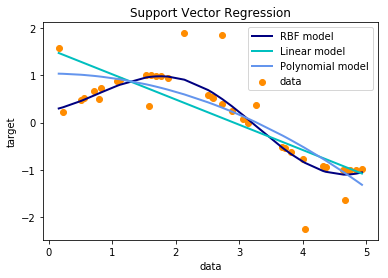

In [17]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# #############################################################################
# Look at the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
